In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from esmpy.datasets.generate_weights import generate_weights
from esmpy.datasets.generate_EDXS_phases import generate_random_phases, unique_elts, generate_modular_phases
from esmpy.datasets.base import generate_dataset
from esmpy.utils import arg_helper
import matplotlib.pyplot as plt
import numpy as np
from esmpy.conf import DEFAULT_SYNTHETIC_DATA_DICT



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generate weights
## Inputs + weights generation

In [9]:
n_phases = 3
seed = 91

weights_dict = {
    "weight_type" : "sphere",
    "shape_2d" : [30,30],
    "radius" : 1.2
}

weights = generate_weights(**weights_dict,n_phases=n_phases,seed=seed)


## Plot of the weights

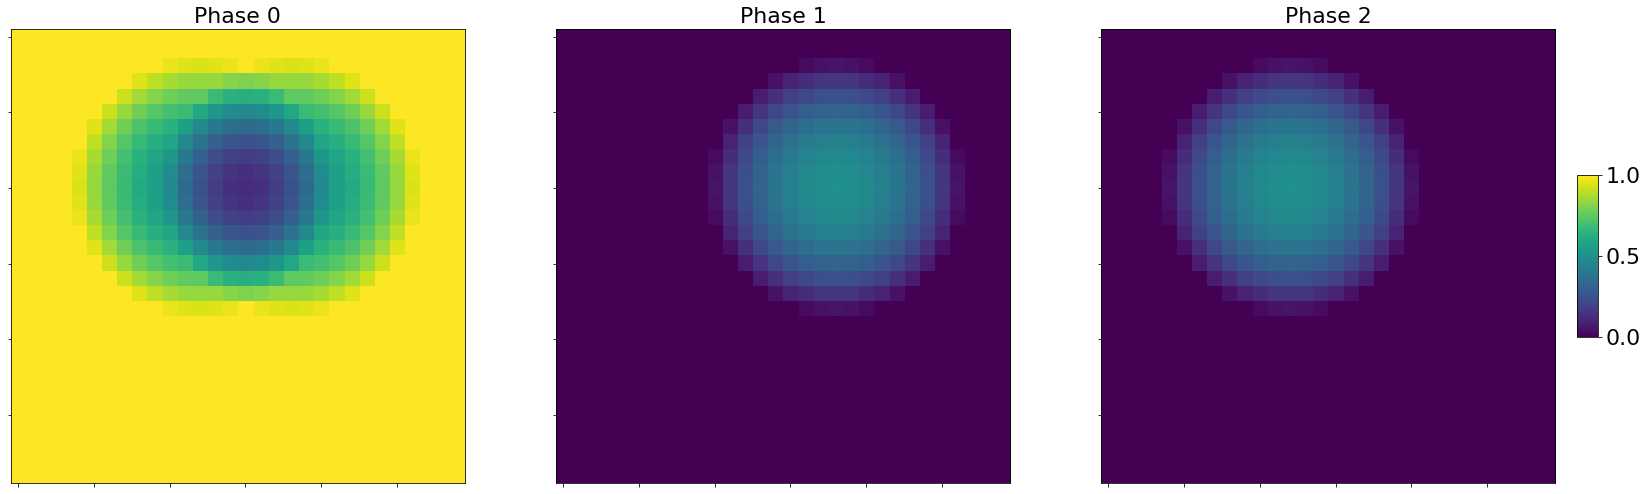

In [10]:
size = weights_dict["shape_2d"][0]
fig,axs = plt.subplots(1,n_phases,figsize = (size,size*n_phases))
for j in range(axs.shape[0]) :
        im = axs[j].imshow(weights[:,:,j],vmin = 0, vmax = 1.0)
        axs[j].tick_params(axis = "both",labelbottom = False,labelleft = False) 
        axs[j].set_title("Phase {}".format(j),fontsize = 22)

fig.subplots_adjust(right=0.84)
# put colorbar at desire position
cbar_ax = fig.add_axes([0.85, 0.49, 0.01, 0.025])
fig.colorbar(im,cax=cbar_ax)
cbar_ax.tick_params(labelsize=22)


# Generate random phases
## Phases generation

In [11]:
phases, phases_dicts = generate_random_phases(n_phases,seed)

## Plot of the phases

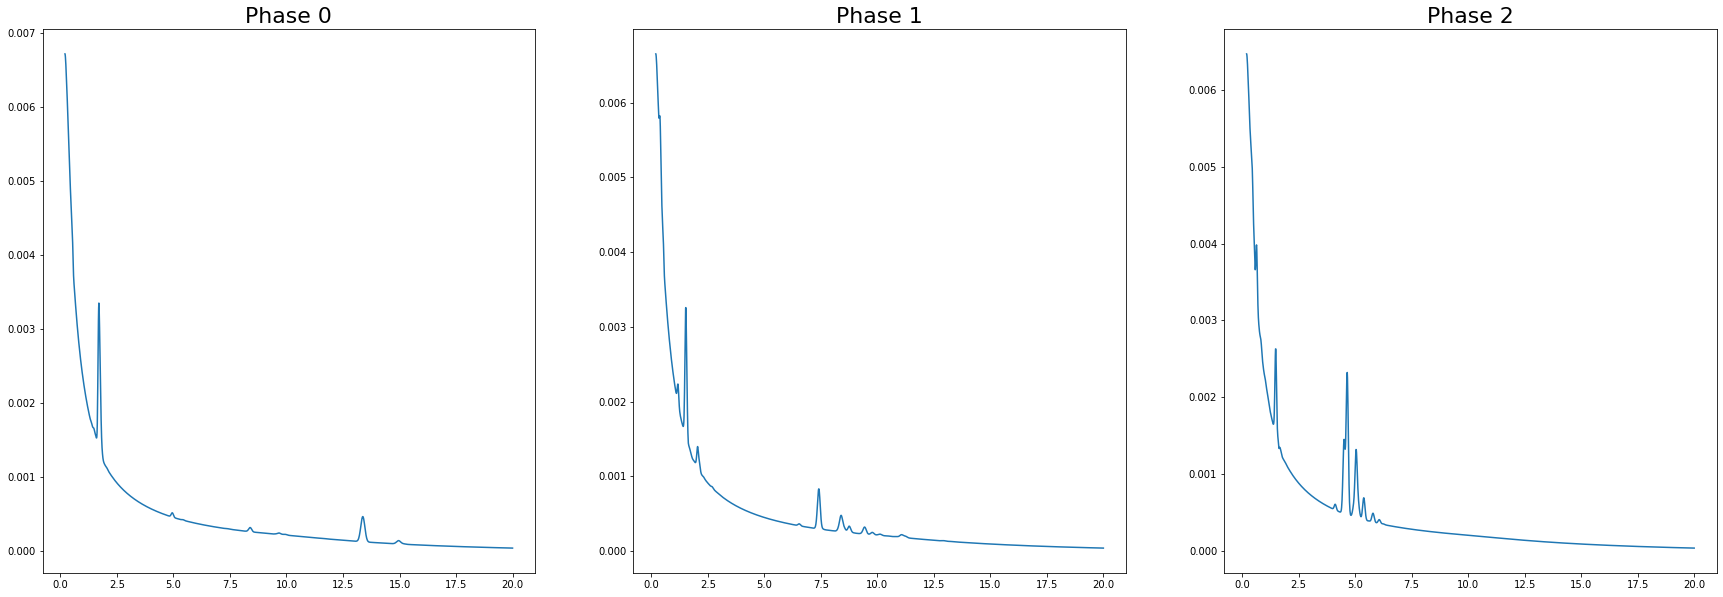

In [12]:
size = 10
fig,axs = plt.subplots(1,n_phases,figsize = (size*n_phases,size))

x = np.linspace(
    DEFAULT_SYNTHETIC_DATA_DICT["model_parameters"]["e_offset"],
    DEFAULT_SYNTHETIC_DATA_DICT["model_parameters"]["e_offset"]+DEFAULT_SYNTHETIC_DATA_DICT["model_parameters"]["e_scale"]*DEFAULT_SYNTHETIC_DATA_DICT["model_parameters"]["e_size"],
    num=DEFAULT_SYNTHETIC_DATA_DICT["model_parameters"]["e_size"])

for j in range(axs.shape[0]) :
    axs[j].plot(x,phases[j])
    axs[j].set_title("Phase {}".format(j),fontsize = 22)


# Generate Data

In [13]:
np.random.seed(seed)
data_dict = {
    "N" : 100,
    "densities" : list(3*np.random.rand(n_phases)),
    "data_folder" : "aspim41_3_random_phases",
    "seed" : seed
}

data_dict.update(weights_dict)
data_dict["phases_parameters"] = phases_dicts

input_dict = arg_helper(data_dict,DEFAULT_SYNTHETIC_DATA_DICT)

generate_dataset(**input_dict)

Warning! Optional argument: ['radius'] specified by user but not used


 30%|███       | 3/10 [30:57<49:02, 420.34s/it]   

Please answer y or n.


 40%|████      | 4/10 [31:13<26:04, 260.71s/it]

Please answer y or n.
Please answer y or n.
Please answer y or n.


100%|██████████| 10/10 [32:39<00:00, 195.99s/it]


# Generate small but realistic data

In [14]:
elts_dicts = [
    {
        "Mg" : 0.245, "Fe" : 0.035, "Ca" : 0.031, "Si" : 0.219, "Al" : 0.024, "O" : 0.446, "Cu" : 0.05, "Hf" : 0.01
    },
    {
        "Mg" : 0.522, "Fe" : 0.104, "O" : 0.374, "Cu" : 0.05
    },
    {
        "Mg" : 0.020, "Fe" : 0.018, "Ca" : 0.188, "Si" : 0.173, "Al" : 0.010, "O" : 0.591, "Ti" : 0.004, "Cu" : 0.05, "Sm" : 0.007, "Lu" : 0.006, "Nd" : 0.006
    }]

brstlg_pars = [
    {"b0" : 0.0003458, "b1" : 0.0006268},
    {"b0" : 0.0001629, "b1" : 0.0009812},
    {"b0" : 0.0007853, "b1" : 0.0003658}
]

model_params = {
        "e_offset" : 0.3,
        "e_size" : 1000,
        "e_scale" : 0.01,
        "width_slope" : 0.01,
        "width_intercept" : 0.065,
        "db_name" : "default_xrays.json",
        "E0" : 200,
        "params_dict" : {
            "Abs" : {
                "thickness" : 100.0e-7,
                "toa" : 35,
                "density" : 4.5,
                "atomic_fraction" : False
            },
            "Det" : "SDD_efficiency.txt"
        }
    }

phases, full_dict = generate_modular_phases(elts_dicts=elts_dicts, brstlg_pars = brstlg_pars, scales = [1, 1, 1], model_params= model_params, seed = seed)

np.random.seed(seed)
data_dict = {
    "N" : 30,
    "densities" : [1.0,0.8,1.2],
    "data_folder" : "small_FpBrgCaPv_N30",
    "seed" : seed
}

data_dict.update(weights_dict)
data_dict.update(full_dict)

input_dict = arg_helper(data_dict,DEFAULT_SYNTHETIC_DATA_DICT)

generate_dataset(**data_dict, seyeds_range=5)



Warning! Optional argument: ['radius'] specified by user but not used


 10%|█         | 1/10 [00:12<01:56, 12.92s/it]

Please answer y or n.


 20%|██        | 2/10 [00:34<02:21, 17.75s/it]

Please answer y or n.


100%|██████████| 10/10 [02:14<00:00, 13.50s/it]
